# Predicting Heart Disease

## Content
1. **Introduction**
    1.1. Objective
    1.2. Dataset
2. **Exploratory Data Analysis**
3. **Modelling**

## Introduction

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

### Objective:

To accurately predict the likelihood of a new patient having heart disease in the future

### Dataset:

The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

## Exploratory Data Analysis

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing data and Initial Analysis

In [3]:
data = pd.read_csv('heart_disease_prediction.csv')

In [4]:
data.shape

(918, 12)

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
numerical_features = []
categorical_features = []

for col in data.columns:
    if data[col].dtype=='object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)
        
print('The categorical columns are:', categorical_features)
print('The numerical columns are:', numerical_features)

The categorical columns are: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
The numerical columns are: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


1. The dataset has 11 features and 1 target label (`HeartDisease`). The average age of patients is 53.5 years and the dataset has no missing values of the 918 observations.
2. The minimum value of `RestingBP` and `Cholesterol` are 0, which is not possible medically

In [9]:
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

### Visualization

In [10]:
data['Sex'].value_counts().values

array([725, 193])

In [11]:
# columns to visualize
viz_col = categorical_features + ['FastingBS','HeartDisease']

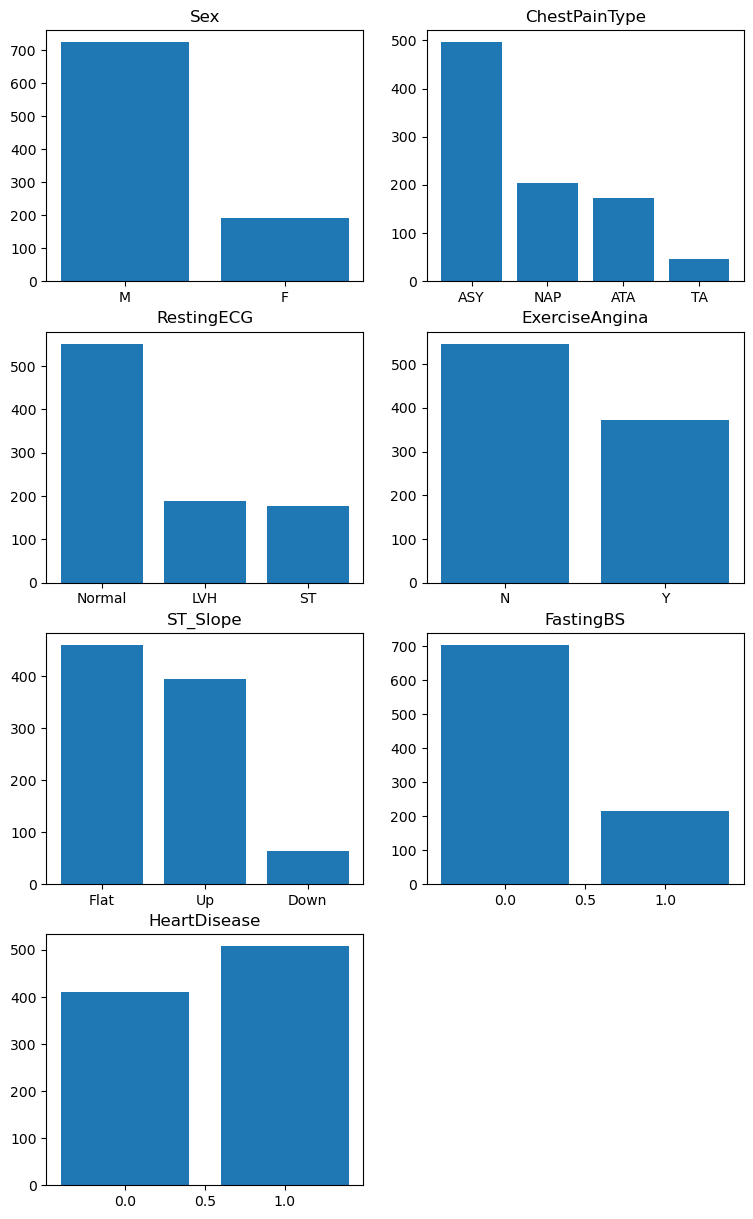

In [12]:
i=1

plt.figure(figsize=(9,15))
for col in viz_col:
    labels = data[col].value_counts().index
    values = data[col].value_counts().values
    plt.subplot(4,2,i)
    plt.bar(labels, values)
    plt.title(col)
    i+=1

plt.show()

In [13]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

The number of male patients (725) are much more than the number of female patients (193). This may cause a bias when generalizing with new data that are female patients.

Number of cases with `ChestPainType` = `ASY` is more than other individual cases (`NAP`,`ATA`,`TA`) of `ChestPainType` combined.

`RestingECG` is Normal in most cases (>500) but there are some cases of `LVH` and `ST` too.

The target label `HeartDisease` is almost evenly distributed: 508 cases of `1` and 410 of `0`.

In [14]:
print('Number of patients having heart disease and are asymptomatic (ASY)- not having chest pain as symptom:',data[(data['ChestPainType']=='ASY')&(data['HeartDisease']==1)].shape[0])

Number of patients having heart disease and are asymptomatic (ASY)- not having chest pain as symptom: 392


In [15]:
print('Number of patients not having heart disease and are asymptomatic (ASY):',data[(data['ChestPainType']=='ASY')&(data['HeartDisease']==0)].shape[0])

Number of patients not having heart disease and are asymptomatic (ASY): 104


### Data Cleaning

In [16]:
(data['RestingBP']==0).sum(), (data['Cholesterol']==0).sum()

(1, 172)

There are 172 obsevations where `Cholesterol` is 0 and 1 observation where `RestingBP` is 0. 

The single observation where `RestingBP` = 0 can be removed, but the same cannot be done in case of `Cholesterol`. 

Therefore for `Cholesterol`, replacing `0` with the `median` value corresponding to each label of `HeartDisease`. 

In [17]:
data[data['RestingBP']==0].index

Int64Index([449], dtype='int64')

In [18]:
data.drop(data[data['RestingBP']==0].index,axis=0, inplace=True)

In [19]:
data.shape

(917, 12)

In [20]:
median_hd_1 = data.loc[data['HeartDisease']==1,'Cholesterol'].median()
median_hd_0 = data.loc[data['HeartDisease']==0,'Cholesterol'].median()

In [21]:
median_hd_1, median_hd_0

(217.0, 227.0)

In [22]:
data.loc[data['HeartDisease']==1,'Cholesterol']

1      180
3      214
8      207
11     164
13     234
      ... 
912    241
913    264
914    193
915    131
916    236
Name: Cholesterol, Length: 507, dtype: int64

In [23]:
data.loc[data['HeartDisease']==1,'Cholesterol'] = data.loc[data['HeartDisease']==1,'Cholesterol'].replace(0,median_hd_1)
data.loc[data['HeartDisease']==0,'Cholesterol'] = data.loc[data['HeartDisease']==0,'Cholesterol'].replace(0,median_hd_0)

In [24]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,239.700109,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,54.352727,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Feature Selection

In [25]:
data = pd.get_dummies(data)

In [26]:
data.shape

(917, 21)

In [27]:
pearson_corr = abs(data.corr()['HeartDisease']).sort_values(ascending=False)

In [28]:
pearson_corr

HeartDisease         1.000000
ST_Slope_Up          0.621843
ST_Slope_Flat        0.553700
ChestPainType_ASY    0.518339
ExerciseAngina_Y     0.495490
ExerciseAngina_N     0.495490
Oldpeak              0.403638
ChestPainType_ATA    0.401680
MaxHR                0.401410
Sex_F                0.305118
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
ChestPainType_NAP    0.215311
ST_Slope_Down        0.122852
RestingBP            0.117990
RestingECG_ST        0.103067
RestingECG_Normal    0.092452
ChestPainType_TA     0.054591
Cholesterol          0.024914
RestingECG_LVH       0.011174
Name: HeartDisease, dtype: float64

Selecting features that has absolute correlation value greater than 0.25:

In [29]:
features_list = []
for col in pearson_corr.index:
    if (pearson_corr[col]>0.25)&(col!='HeartDisease'):
        features_list.append(col)

In [30]:
features_list

['ST_Slope_Up',
 'ST_Slope_Flat',
 'ChestPainType_ASY',
 'ExerciseAngina_Y',
 'ExerciseAngina_N',
 'Oldpeak',
 'ChestPainType_ATA',
 'MaxHR',
 'Sex_F',
 'Sex_M',
 'Age',
 'FastingBS']

In [31]:
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

KNN with each of the features one at a time:

In [33]:
from sklearn.neighbors import KNeighborsClassifier

for feature in features_list:
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train[[feature]], y_train)
    print(f'For feature = {feature}, the accuracy is {knn.score(X_val[[feature]], y_val)}')

For feature = ST_Slope_Up, the accuracy is 0.483695652173913
For feature = ST_Slope_Flat, the accuracy is 0.483695652173913
For feature = ChestPainType_ASY, the accuracy is 0.483695652173913
For feature = ExerciseAngina_Y, the accuracy is 0.75
For feature = ExerciseAngina_N, the accuracy is 0.75
For feature = Oldpeak, the accuracy is 0.7119565217391305
For feature = ChestPainType_ATA, the accuracy is 0.483695652173913
For feature = MaxHR, the accuracy is 0.5434782608695652
For feature = Sex_F, the accuracy is 0.483695652173913
For feature = Sex_M, the accuracy is 0.34782608695652173
For feature = Age, the accuracy is 0.5434782608695652
For feature = FastingBS, the accuracy is 0.6195652173913043


Of all features, the model performance is best with features `ExerciseAngina_Y`, `ExerciseAngina_N` (75%) followed by `Oldpeak` (71.2%)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features_list])
X_val_scaled = scaler.transform(X_val[features_list])

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.score(X_val_scaled, y_val)

0.8641304347826086

The accuracy of the model has increased from `75%` to `86.4%` after normalizing and applying KNN for the selected features.

### Hyperparameter Optimization

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X[features_list], y, test_size=0.2, random_state=7)

In [37]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[3,5,7,9,12, 15,20,25],
       'weights':['uniform','distance'], 
        'p':[1,2,3]}

knn = KNeighborsClassifier()

hpt = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')
hpt.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 12, 15, 20, 25],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [39]:
hpt.best_score_

0.8635448700027956

In [40]:
hpt.best_params_

{'n_neighbors': 20, 'p': 3, 'weights': 'distance'}

### Evaluation

In [41]:
X_test_scaled =  scaler.transform(X_test)

In [42]:
model = hpt.best_estimator_
model

KNeighborsClassifier(n_neighbors=20, p=3, weights='distance')

In [43]:
print('The accuracy of the model after Hyper Parameter Tuning is: ', model.score(X_test_scaled, y_test))

The accuracy of the model after Hyper Parameter Tuning is:  0.8695652173913043
